# Домашнее задание 3. 

## Предсказание пользовательской оценки отеля по тексту отзыва.

Мы собрали для вас отзывы по 1500 отелям из совершенно разных уголков мира. Что это за отели - секрет. Вам дан текст отзыва и пользовательская оценка отеля. Ваша задача - научиться предсказывать оценку отеля по отзыву. Данные можно скачать [тут](https://www.kaggle.com/c/hseds-texts-2020/data?select=train.csv).

Главная метрика - Mean Absolute Error (MAE). Во всех частях домашней работы вам нужно получить значение MAE не превышающее 1. В противном случае мы будем вынуждены не засчитать задание :( 

Для измерения качества вашей модели используйте разбиение данных на train и test и замеряйте качество на тестовой части.

#### Про данные:
Каждое ревью состоит из двух текстов: positive и negative - плюсы и минусы отеля. В столбце score находится оценка пользователя - вещественное число 0 до 10. Вам нужно извлечь признаки из этих текстов и предсказать по ним оценку.

Удачи! 💪

#### Использовать внешние данные для обучения строго запрещено. Можно использовать предобученные модели из torchvision.

In [1]:
!wget https://www.dropbox.com/s/tfd6kos0rbvkyi4/train.csv.zip #снова выложила на дропбокс
!unzip -q train.csv.zip

--2020-12-21 00:16:26--  https://www.dropbox.com/s/tfd6kos0rbvkyi4/train.csv.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tfd6kos0rbvkyi4/train.csv.zip [following]
--2020-12-21 00:16:26--  https://www.dropbox.com/s/raw/tfd6kos0rbvkyi4/train.csv.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2d70666e2cdfd4c849ecb6e19f.dl.dropboxusercontent.com/cd/0/inline/BFcpq53N0HSVG8XGRweFSZjfFGt9LLXb1rGpi5w9IcEG0M5D3ZcRSwX0_ulCM1_7AAP7kVscftFjHr8H-RdVv308ZQoyjOtEEdsKfNhs1aHlGEDn1dkV3ql3UPDGLBL5OiI/file# [following]
--2020-12-21 00:16:26--  https://uc2d70666e2cdfd4c849ecb6e19f.dl.dropboxusercontent.com/cd/0/inline/BFcpq53N0HSVG8XGRweFSZjfFGt9LLXb1rGpi5w9IcEG0M5D3ZcRSwX0_ulCM1_7AAP7kVscftFjHr8H-RdVv308ZQoyjOtEEdsKfNhs1aHl

In [2]:
!ls -l

total 31272
-rw-r--r-- 1 root root 22811739 Oct 12 11:12 train.csv
-rw-r--r-- 1 root root  9205566 Dec 21 00:16 train.csv.zip


In [3]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,review_id,negative,positive,score
0,00003c6036f30f590c0ac435efb8739b,There were issues with the wifi connection,No Positive,7.1
1,00004d18f186bf2489590dc415876f73,TV not working,No Positive,7.5
2,0000cf900cbb8667fad33a717e9b1cf4,More pillows,Beautiful room Great location Lovely staff,10.0
3,0000df16edf19e7ad9dd8c5cd6f6925e,Very business,Location,5.4
4,00025e1aa3ac32edb496db49e76bbd00,Rooms could do with a bit of a refurbishment ...,Nice breakfast handy for Victoria train stati...,6.7


Предобработка текста может сказываться на качестве вашей модели.
Сделаем небольшой препроцессинг текстов: удалим знаки препинания, приведем все слова к нижнему регистру. 
Однако можно не ограничиваться этим набором преобразований. Подумайте, что еще можно сделать с текстами, чтобы помочь будущим моделям? Добавьте преобразования, которые могли бы помочь по вашему мнению.

Также мы добавили разбиение текстов на токены. Теперь каждая строка-ревью стала массивом токенов.

In [4]:
import string

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

def process_text(text):
    return [word for word in word_tokenize(text.lower()) if word not in string.punctuation]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df["combined"] = df['positive'] + " " + df['negative'] #создаю колонку с объединенными отзывами

In [6]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df)

In [7]:
df_train

,review_id,negative,positive,score,combined
95629,f4beb7e9823c3e8ef4649566e83723c0,No complaints,The central location and helpfulness of the s...,10.0,The central location and helpfulness of the s...
58681,96397d76375291d8695127eabd226734,I arrived by car yet the parking at the hotel...,Very nice and helpful reception staff who eve...,8.3,Very nice and helpful reception staff who eve...
16939,2bcb04df5bd528b90ee3b256af9aa5ef,difficult to work out the lights,comfy bed quietness,9.2,comfy bed quietness difficult to work out th...
80844,cea93ce65c2f7258d351944fb63863df,No Negative,Great location wonderful staff they were so a...,10.0,Great location wonderful staff they were so a...
6616,114a53636bc5f19cc84572deeb7fb31e,No Negative,The receptionist was fantastic Friendly helpf...,9.2,The receptionist was fantastic Friendly helpf...
...,...,...,...,...,...
77968,c77985be69f0e6e9d580e45bca9f09b0,The room was tiny situated next to an elevato...,The location,5.8,The location The room was tiny situated next...
6183,1009a618ce0e33cd41c87249ddde22cb,Service could have been better at the rooftop...,Large apartment well furnished well stocked k...,10.0,Large apartment well furnished well stocked k...
96891,f7ee540edc80b650d7ea6fdd57e727de,The temperature of the water in the bathroom ...,They went out of their way to make us feel we...,9.6,They went out of their way to make us feel we...
47418,79c21509cef8889edf7f084e0368fc0d,Length of time to process credit card reversal,Staff coutoeous,7.1,Staff coutoeous Length of time to process cr...


### Часть 1. 1 балл

Обучите логистическую регрессию на TF-IDF векторах текстов.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

In [9]:
vectorizer = TfidfVectorizer(min_df=0.001, max_df=0.20) #выкидываю слишком частотные слова, это дает сильно лучше качество

In [10]:
tfidf_train = df_train['combined']

In [11]:
tfidf_test = df_test['combined']

In [12]:
tfidf_train = vectorizer.fit_transform(tfidf_train)

In [13]:
tfidf_test = vectorizer.transform(tfidf_test)

In [14]:
lr_model = LinearRegression()

In [15]:
lr_model.fit(tfidf_train, df_train['score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
mean_absolute_error(lr_model.predict(tfidf_test), df_test['score'])

0.9170463960050025

Параметры для tf-idf взяла на рандом [отсюда](https://www.programcreek.com/python/example/83254/sklearn.feature_extraction.text.TfidfVectorizer
)

### Часть 2. 3 балла

Обучите логистическую регрессию на усредненных Word2Vec векторах. 

In [18]:
from gensim.models import Word2Vec 

In [19]:
wv_train = df_train['combined'].apply(process_text)

In [20]:
wv_test = df_test['combined'].apply(process_text)

In [21]:
wv_train #создаю датасет с разбитыми по спискам строками, чтоб потом это скормить w2v

95629    [the, central, location, and, helpfulness, of,...
58681    [very, nice, and, helpful, reception, staff, w...
16939    [comfy, bed, quietness, difficult, to, work, o...
80844    [great, location, wonderful, staff, they, were...
6616     [the, receptionist, was, fantastic, friendly, ...
                               ...                        
77968    [the, location, the, room, was, tiny, situated...
6183     [large, apartment, well, furnished, well, stoc...
96891    [they, went, out, of, their, way, to, make, us...
47418    [staff, coutoeous, length, of, time, to, proce...
39446    [great, spa, central, and, super, convenient, ...
Name: combined, Length: 75000, dtype: object

In [22]:
w2v_one = Word2Vec(sentences=wv_train, size= 100)

In [23]:
w2v_one.wv.most_similar(positive=["view"])

[('views', 0.8429781794548035),
 ('balcony', 0.6779142618179321),
 ('overlooking', 0.6252285242080688),
 ('terrace', 0.5896338224411011),
 ('inner', 0.5553147792816162),
 ('courtyard', 0.5219959616661072),
 ('yard', 0.5116060972213745),
 ('facing', 0.5106635689735413),
 ('tower', 0.5021057724952698),
 ('veiw', 0.49938350915908813)]

In [24]:
import numpy as np 

In [25]:
np.array([2,3]) + np.array([1,5])

array([3, 8])

In [26]:
def sent_w2v(sentence, model):
    fin = np.array([0]*model.vector_size) #этот вектор будет подстраиваться под размер эмбеддинга
    for word in sentence:
        if word in model.wv.vocab.keys(): #проверяю, что слово есть в словаре, т.к. в этом задании я не обучала w2v на тестовой выборке -> там могут
            fin = fin + model[word] #быть не встречавшиеся в трейне слова 
        else: 
            pass
    return fin/np.array(len(sentence) + 1e-2) #на случай пустой строки добавляю копеечку

In [27]:
def df_w2v(df, model):
    new = [sent_w2v(item, model) for item in df]
    return new

In [28]:
v2w_train1 = df_w2v(wv_train, w2v_one)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [29]:
v2w_test1 = df_w2v(wv_test, w2v_one)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [30]:
lr_model.fit(v2w_train1, df_train['score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
mae1 = mean_absolute_error(lr_model.predict(v2w_test1), df_test['score'])
mae1

1.0456613864519437

Усредняя w2v вектора, мы предполагаем, что каждое слово имеет равноценный вклад в смысл предложения, однако это может быть не совсем так. Теперь попробуйте воспользоваться другой концепцией и перевзвесить слова при получении итогового эмбеддинга текста. В качестве весов используйте IDF (Inverse document frequency)

Сначала обучу tf-idf vectorizer, чтоб он выдавал idf 

In [32]:
vectorizer2 = TfidfVectorizer(use_idf=True, vocabulary=w2v_one.wv.vocab.keys()) #ищем idf по тем же словам, что посутпили в ворд ту век 

In [33]:
vectorizer2.fit([(' ').join(line) for line in wv_train]) #тут лежат объединенные отзывы из трейна, я их склеиваю в строку, тк иначе векторайзер не примет

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use...
                vocabulary=dict_keys(['the', 'central', 'location', 'and', 'helpfulness', 'of', 'staff', 'plus', 'breakfast', 'no', 'complaints', 'very', 'nice', 'helpful', 'reception', 'who', 'even', 'gave', 'us', 'some', 'great', 'tips', 'little', 'known', 'less', 'touristic', 'places', 'you', 'can', 'rent', 'bikes', 'at', 'hotel', 'which', 'saves', 'trouble', 'looking', 'for', 'a', 'rental', 'place', 'is', 'close', 'to', 'city', 'centre', 'thus', 'just', 'short', 'away', 'from', 'all', 'locations', 'i', 'arrived', 'by', 

In [34]:
[(' ').join(line) for line in wv_train][0] #проверяю, что это норм работает 

'the central location and helpfulness of the staff plus pukka breakfast no complaints'

In [35]:
idf = vectorizer2.idf_ 
len(vectorizer2.idf_ )

8697

In [36]:
idfs = dict(zip(vectorizer2.get_feature_names(), idf)) #создаю словарик, где словам соответствуют их idf 

In [37]:
def sent_w2v_idf(sentence, model):
    fin = np.array([0]*model.vector_size)
    for word in sentence:
        if word in model.wv.vocab.keys(): 
            fin = fin + model[word]*(idfs[word] - 1)
        else: 
            pass
    return fin 

Я вычитаю 1, так как по дефолту tfidfvetorizer к idf добавляет 1 ([пруф](https://stackoverflow.com/questions/36756335/calculating-idf-using-tfidfvectorizer-from-sklearn-feature-extraction-text-tfidf))

In [38]:
def df_w2v_idf(df, model):
    new = [sent_w2v_idf(item, model) for item in df]
    return new

In [39]:
w2v_one['nice']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 1.0103371 , -1.8279282 ,  0.45265922,  2.7383347 ,  0.22794527,
        0.7251977 , -1.019404  ,  2.658697  , -0.75378525, -0.86681324,
        0.3777644 , -0.43296733, -0.02857683, -0.23407161, -2.2813926 ,
       -0.2877636 , -2.3921995 ,  0.24896592,  0.22245103, -0.25676814,
        1.6997426 ,  0.24518259, -1.040208  , -0.8473157 , -0.3411123 ,
       -0.6816792 , -1.3731414 , -1.892572  ,  0.37437636, -0.9440226 ,
       -0.16773936, -1.6379933 , -0.6186026 ,  0.7465456 , -0.1756425 ,
       -0.83920264, -1.423778  ,  0.6333255 , -1.6784024 , -0.1778119 ,
        0.3251245 ,  0.9232042 , -0.7187944 ,  0.4342579 ,  0.47205397,
        1.0366596 ,  0.5545952 ,  1.4046327 ,  0.08698767,  1.5456557 ,
       -1.1937954 , -0.11594364,  0.4210697 ,  0.5272433 , -0.22989494,
        2.367037  ,  0.46523842, -1.0155061 ,  0.53060097,  0.51444834,
       -0.02289132,  1.8908141 , -0.35836112, -0.66226935, -0.29561147,
       -0.45928732,  0.71079814,  0.33891362, -0.33563998, -3.53

In [40]:
idfs['nice']

3.00972982709941

In [41]:
w2v_one['nice']*idfs['nice']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([  3.0408418 ,  -5.50157   ,   1.3623819 ,   8.241648  ,
         0.6860537 ,   2.1826491 ,  -3.0681307 ,   8.00196   ,
        -2.2686899 ,  -2.6088736 ,   1.1369689 ,  -1.3031148 ,
        -0.08600855,  -0.70449233,  -6.8663754 ,  -0.8660907 ,
        -7.1998744 ,   0.74932015,   0.6695175 ,  -0.7728027 ,
         5.115766  ,   0.73793334,  -3.130745  ,  -2.5501914 ,
        -1.0266558 ,  -2.0516703 ,  -4.132785  ,  -5.6961308 ,
         1.1267717 ,  -2.841253  ,  -0.50485015,  -4.9299173 ,
        -1.8618267 ,   2.2469006 ,  -0.5286365 ,  -2.5257733 ,
        -4.2851872 ,   1.9061388 ,  -5.051538  ,  -0.5351658 ,
         0.9785369 ,   2.7785952 ,  -2.163377  ,   1.306999  ,
         1.4207549 ,   3.1200655 ,   1.6691817 ,   4.227565  ,
         0.26180938,   4.652006  ,  -3.5930018 ,  -0.34895903,
         1.2673061 ,   1.58686   ,  -0.69192165,   7.124142  ,
         1.400242  ,  -3.056399  ,   1.5969656 ,   1.5483506 ,
        -0.0688967 ,   5.69084   ,  -1.0785701 ,  -1.99

In [42]:
v2w_train1_idf = df_w2v_idf(wv_train, w2v_one)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [43]:
v2w_test1_idf = df_w2v_idf(wv_test, w2v_one)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [44]:
lr_model.fit(v2w_train1_idf, df_train['score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
mae1_idf = mean_absolute_error(lr_model.predict(v2w_test1_idf), df_test['score'])
mae1_idf

1.027295012633059

Далее попробую с векторами размера 200, 300, 500, 800

In [46]:
w2v_two = Word2Vec(sentences=wv_train, size= 200)

In [47]:
v2w_train2 = df_w2v(wv_train, w2v_two)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [48]:
v2w_test2 = df_w2v(wv_test, w2v_two)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [49]:
lr_model.fit(v2w_train2, df_train['score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
mae2 = mean_absolute_error(lr_model.predict(v2w_test2), df_test['score'])
mae2

1.022035378727736

In [51]:
v2w_train2_idf = df_w2v_idf(wv_train, w2v_two)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [52]:
v2w_test2_idf = df_w2v_idf(wv_test, w2v_two)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [53]:
lr_model.fit(v2w_train2_idf, df_train['score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
mae2_idf = mean_absolute_error(lr_model.predict(v2w_test2_idf), df_test['score'])
mae2_idf

0.9887834458788837

In [55]:
w2v_three = Word2Vec(sentences=wv_train, size= 300)

In [56]:
v2w_train3 = df_w2v(wv_train, w2v_three)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [57]:
v2w_test3 = df_w2v(wv_test, w2v_three)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [58]:
lr_model.fit(v2w_train3, df_train['score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
mae3 = mean_absolute_error(lr_model.predict(v2w_test3), df_test['score'])
mae3

1.0142415639780809

In [60]:
v2w_train3_idf = df_w2v_idf(wv_train, w2v_three)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [61]:
v2w_test3_idf = df_w2v_idf(wv_test, w2v_three)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [62]:
lr_model.fit(v2w_train3_idf, df_train['score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
mae3_idf = mean_absolute_error(lr_model.predict(v2w_test3_idf), df_test['score'])
mae3_idf

0.9750252605675549

In [64]:
w2v_four = Word2Vec(sentences=wv_train, size= 500)

In [65]:
v2w_train4 = df_w2v(wv_train, w2v_four)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [66]:
v2w_test4 = df_w2v(wv_test, w2v_four)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [67]:
lr_model.fit(v2w_train4, df_train['score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
mae4 = mean_absolute_error(lr_model.predict(v2w_test4), df_test['score'])
mae4

0.9978672525105143

In [69]:
v2w_train4_idf = df_w2v_idf(wv_train, w2v_four)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [70]:
v2w_test4_idf = df_w2v_idf(wv_test, w2v_four)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [71]:
lr_model.fit(v2w_train4_idf, df_train['score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
mae4_idf = mean_absolute_error(lr_model.predict(v2w_test4_idf), df_test['score'])
mae4_idf

0.950996555712033

In [73]:
w2v_five = Word2Vec(sentences=wv_train, size= 800)

In [74]:
v2w_train5 = df_w2v(wv_train, w2v_five)
v2w_test5 = df_w2v(wv_test, w2v_five)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [75]:
lr_model.fit(v2w_train5, df_train['score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
mae5 = mean_absolute_error(lr_model.predict(v2w_test5), df_test['score'])
mae5

0.986646959400278

In [77]:
v2w_train5_idf = df_w2v_idf(wv_train, w2v_five)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [78]:
v2w_test5_idf = df_w2v_idf(wv_test, w2v_five)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [79]:
lr_model.fit(v2w_train5_idf, df_train['score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
mae5_idf = mean_absolute_error(lr_model.predict(v2w_test5_idf), df_test['score'])
mae5_idf

0.9408995057102069

Проведите эксперименты с размерностью эмбеддинга. Для каждого из двух методов постройте график зависимости качества модели от размерности эмбеддинга. 
#### Сделайте выводы:

In [81]:
import matplotlib.pyplot as plt

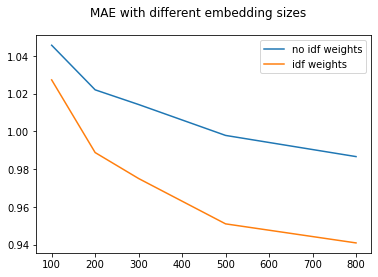

In [82]:
res = [mae1, mae2, mae3, mae4, mae5]
res_idf = [mae1_idf, mae2_idf, mae3_idf, mae4_idf, mae5_idf]
size = [100, 200, 300, 500, 800]
plt.plot(size, res, label = 'no idf weights')
plt.plot(size, res_idf, label = 'idf weights')
plt.suptitle('MAE with different embedding sizes')
plt.legend();

Вводы: 
1. С повышением размерности представления растет качество для обоих типов модели (MAE снижается).  
2. Домножение на idf сильно помогает нам обучаться 
3. С увеличением размерности качество на модели с idf растет быстрее, а не модели без – особо не меняется.  
4. Мы взяли максимальный размер эмбеддинга 800, и обе модели все еще не переобучились (ошибка не начала расти). Возможно, это случилось бы более высоких зачениях, но 800 – это уже достаточно много 

Теперь попробуйте обучить логистическую регрессию на любых других эмбеддингах размерности 300 и сравните качество с Word2Vec.
#### Выводы:

Я буду смотреть на предобученные модели

In [83]:
import gensim.downloader as api
glove = api.load("glove-wiki-gigaword-300")
glove.most_similar("cat")

[===============================================---] 95.2% 358.0/376.1MB downloaded

[('dog', 0.6816747188568115),
 ('cats', 0.6815836429595947),
 ('pet', 0.5870364904403687),
 ('dogs', 0.540766716003418),
 ('feline', 0.48979705572128296),
 ('monkey', 0.48794347047805786),
 ('horse', 0.4732130467891693),
 ('pets', 0.4634858965873718),
 ('rabbit', 0.4608757495880127),
 ('leopard', 0.4585462808609009)]

In [84]:
g_train = df_w2v(wv_train, glove)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [85]:
g_test = df_w2v(wv_test, glove)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [86]:
len(g_train[0])

300

In [87]:
lr_model.fit(g_train, df_train['score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
mae_g = mean_absolute_error(lr_model.predict(g_test), df_test['score'])
mae_g

1.0463026853480533

In [89]:
ft = api.load('fasttext-wiki-news-subwords-300') 

[================================================--] 97.9% 938.1/958.4MB downloaded


In [90]:
ft_train = df_w2v(wv_train, ft)
ft_test = df_w2v(wv_test, ft)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [91]:
lr_model.fit(ft_train, df_train['score'])
mae_ft = mean_absolute_error(lr_model.predict(ft_test), df_test['score'])
mae_ft

1.0262326833497744

In [92]:
mae3 #ошибка на w2v с размерностью 300 

1.0142415639780809

Как видно, на тренированном w2v качество чуть лучше, но и предобученные модели выдают довольно низкую ошибку. Можно предположить, что у нас в отзывах не особо редкие слова, и fasttext и glove их также знают 

### Часть 3. 6 баллов

Теперь давайте воспользуемся более продвинутыми методами обработки текстовых данных, которые мы проходили в нашем курсе. Обучите RNN/Transformer для предсказания пользовательской оценки. Получите ошибку меньше, чем во всех вышеперечисленных методах.

Наименьшая ошибка у меня была на tfidfvectorizer ~ 0.92 

Если будете обучать RNN, попробуйте ограничить максимальную длину предложения. Некоторые отзывы могут быть слишком длинные относительно остальных.

Чтобы пользоваться DataLoader, все его элементы должны быть одинаковой размерности. Для этого вы можете добавить нулевой паддинг ко всем предложениям (см пример pad_sequence)

In [93]:
import torch
from torch import nn
from torch.nn import functional as F

In [94]:
import string

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

def process_text(text):
    return [word for word in word_tokenize(text.lower()) if word not in string.punctuation]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [95]:
all_reviews = df['combined']
all_reviews = all_reviews.apply(process_text)

In [96]:
WORDS = set()
for sent in list(all_reviews):
    for word in sent: 
      WORDS.add(word)

In [97]:
int2word = dict(enumerate(tuple(WORDS))) #словарь будет со всеми словами в датасете – и на трейне и на тесте 
word2int = {w: ii for ii, w in int2word.items()} #обучаться конечно буду только на трейне 

In [98]:
len(WORDS)

34728

In [99]:
word2int['room']

16889

In [100]:
MAX_LEN = max(all_reviews.apply(len))
MAX_LEN

633

In [101]:
mean_len = np.mean(all_reviews.apply(len))
mean_len

34.40696

In [102]:
from torch.nn.utils.rnn import pad_sequence

MAX_LEN = 100 #я ограничу длину предложений до 100, так как средняя длина – 34, а максимальная 600+. При макисмальной длине больше 100 модель очень плохо 
#обучалась, видимо, из-за большого чсила нулей 

train_rew_pad = pad_sequence([torch.as_tensor([word2int[w] for w in seq][:MAX_LEN]) for seq in df_train['combined'].apply(process_text)],
                             batch_first=True)

In [103]:
test_rew_pad = pad_sequence([torch.as_tensor([word2int[w] for w in seq][:MAX_LEN]) for seq in df_test['combined'].apply(process_text)], batch_first=True)

In [104]:
from torch.utils.data import TensorDataset, DataLoader

In [105]:
torch.tensor(list(df_train['score']))

tensor([10.0000,  8.3000,  9.2000,  ...,  9.6000,  7.1000,  6.3000])

In [106]:
rnn_train = TensorDataset(train_rew_pad, torch.tensor(list(df_train['score']))) #Тензордатасет можно сразу передать в даталоудер

In [107]:
rnn_test = TensorDataset(test_rew_pad, torch.tensor(list(df_test['score'])))

In [108]:
batch_size = 5
train_dataloader = torch.utils.data.DataLoader(rnn_train, batch_size=batch_size)
test_dataloader = torch.utils.data.DataLoader(rnn_test, batch_size=batch_size)

In [109]:
dataiter = iter(train_dataloader) #проверяю, как выглядит один батч 
sample_x, sample_y = dataiter.next()
sample_x

tensor([[27975, 34019, 14677, 30505, 20013, 13276, 27975,  8310,  6142, 13028,
         21839, 29964,  8790,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
        [20666, 10666, 30505,  9475, 31263,  8310, 23932, 26271, 12576, 20073,
          9182, 17395, 25112, 13276,  6891, 19679, 33451, 26472, 18104, 24218,
         23155,  9890, 21096, 10555, 27975, 11283, 

In [110]:
sample_y

tensor([10.0000,  8.3000,  9.2000, 10.0000,  9.2000])

In [111]:
sample_x.size()

torch.Size([5, 100])

In [112]:
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
else: 
    print('No GPU available, training on CPU; consider making n_epochs very small.')

Training on GPU!


In [113]:
class SentimentRNN(nn.Module): #модель вдохновлена семинаром и одинм ноутбуком, ссылка на него внизу

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.3):
     
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim) #вместо кажого слова получим какой-то вектор
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, #из lstm будем брать выход6 и скрытое состояние
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear layer
        self.fc = nn.Linear(hidden_dim, output_size) #для предсказания – линейная регрессия

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)
        
        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        # reshape to be batch_size first
        out = out.view(batch_size, -1)
        out = out[:, -1] # get last batch of labels
        
        # return last output and hidden state
        return out, hidden
    
    
    def init_hidden(self, batch_size):
        
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if(train_on_gpu):
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                   weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                   weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden
        
        

In [114]:
vocab_size = len(word2int) + 1 # +1 добавляется из-за паддинга 
output_size = 1 #модель предсказывет одно число 
embedding_dim = 600 #из второго задания было ясно, что чем больше размер эмбеддинга, тем лучше 
hidden_dim = 64 #если взять больше сеть очень тяжело и долго обучалась 
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(34729, 600)
  (lstm): LSTM(600, 64, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


In [115]:
epochs = 4 #после четвертой эпохи лосс особо не падает, минимум был 0.89 на пятой эпохе, так что я ограничилась 4 

counter = 0
print_every = 5000
clip=5 # gradient clipping


lr=0.005

if train_on_gpu:
    net.cuda()

criterion = nn.L1Loss() #это MAE 
optimizer = torch.optim.Adagrad(net.parameters(), lr = lr)

net.train()
for e in range(epochs):
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_dataloader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        h = tuple([each.data for each in h])

        net.zero_grad()

        output, h = net(inputs, h)

        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        if counter % print_every == 0:
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in test_dataloader:

                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()), #выводится лосс последнего элемента в батче на трейне (поэтому он так скачет)
                  "Val Loss: {:.6f}".format(np.mean(val_losses))) #и средняя mae по тесту 

Epoch: 1/4... Step: 5000... Loss: 1.529429... Val Loss: 1.152990
Epoch: 1/4... Step: 10000... Loss: 2.004452... Val Loss: 1.115179
Epoch: 1/4... Step: 15000... Loss: 0.831468... Val Loss: 1.059871
Epoch: 2/4... Step: 20000... Loss: 1.064122... Val Loss: 1.021471
Epoch: 2/4... Step: 25000... Loss: 1.804907... Val Loss: 0.992588
Epoch: 2/4... Step: 30000... Loss: 0.764526... Val Loss: 0.963415
Epoch: 3/4... Step: 35000... Loss: 1.385325... Val Loss: 0.935809
Epoch: 3/4... Step: 40000... Loss: 1.525259... Val Loss: 0.925402
Epoch: 3/4... Step: 45000... Loss: 0.895082... Val Loss: 0.933424
Epoch: 4/4... Step: 50000... Loss: 1.354910... Val Loss: 0.902682
Epoch: 4/4... Step: 55000... Loss: 1.407071... Val Loss: 0.903139
Epoch: 4/4... Step: 60000... Loss: 1.600182... Val Loss: 0.891100


Честно признаюсь, что вдохновлялась [этой тетрадкой](https://colab.research.google.com/github/agungsantoso/deep-learning-v2-pytorch/blob/master/sentiment-rnn/Sentiment_RNN_Exercise.ipynb#scrollTo=rJqrvKg0pmwu), и еще мне очень помог вот [этот пост](https://datascience.stackexchange.com/questions/45503/understanding-output-of-lstm-for-regression), чтобы адаптировать код под линейную регрессию, а не под классификацию 

### Бонус. 10 баллов

Побейте качество 0.75 в [соревновании](https://www.kaggle.com/c/hseds-texts-2020/leaderboard). Можете воспользоваться вышеперечисленными методами или попробовать что-нибудь еще.